Eden growth model with cell death

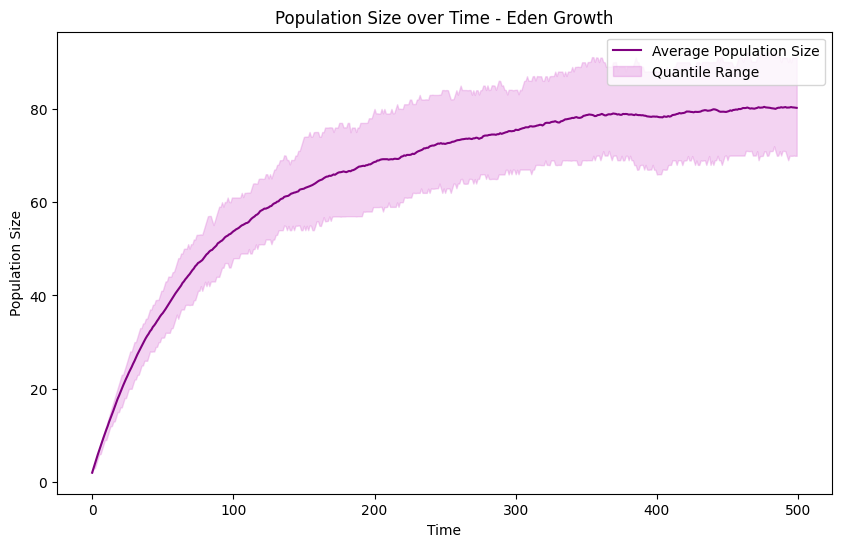

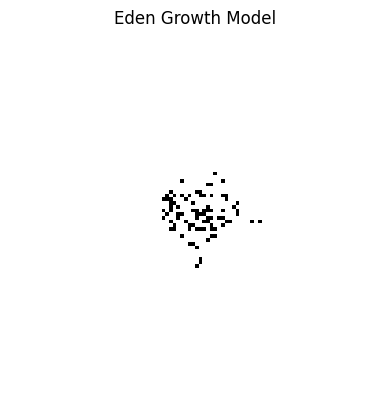

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(size):
    grid = np.zeros((size, size), dtype=int)
    center = size // 2
    grid[center, center] = 1  # Start with a single occupied cell in the center
    border = set(get_moore_neighborhood(center, center, size))
    return grid, border

def get_moore_neighborhood(x, y, size):
    neighbors = [(i, j) for i in range(x-1, x+2) for j in range(y-1, y+2) if (0 <= i < size and 0 <= j < size)]
    neighbors.remove((x, y))
    return neighbors

def grow_cluster(grid, border, iterations, death_prob=0.01):
    size = grid.shape[0]
    population_size = []
    for _ in range(iterations):
        if not border:
            break
        new_site = list(border)[np.random.randint(len(border))]
        grid[new_site] = 1
        border.remove(new_site)
        population_size.append(np.sum(grid))
        for nx, ny in get_moore_neighborhood(*new_site, size):
            if grid[nx, ny] == 0:
                border.add((nx, ny))

        # Handle cell death
        death_sites = [(x, y) for x in range(size) for y in range(size) if grid[x, y] == 1 and np.random.rand() < death_prob]
        for ds in death_sites:
            grid[ds] = 0
            border.discard(ds)  # Remove dead cell from border if it was a border cell

        # Update border after cell death
        for x, y in death_sites:
            for nx, ny in get_moore_neighborhood(x, y, size):
                if grid[nx, ny] == 1:
                    border.add((nx, ny))
                elif (nx, ny) in border:
                    if all(grid[nxx, nyy] == 0 for nxx, nyy in get_moore_neighborhood(nx, ny, size)):
                        border.discard((nx, ny))

    return grid, population_size

def plot_grid(grid):
    plt.imshow(grid, cmap='Greys', interpolation='nearest')
    plt.title('Eden Growth Model')
    plt.axis('off')
    plt.show()

# Parameters
grid_size = 100
iterations = 500
num_simulations = 100
death_prob = 0.01  # Probability of cell death in each iteration

# Run simulations
all_population_sizes = []
for _ in range(num_simulations):
    grid, border = initialize_grid(grid_size)
    _, population_size = grow_cluster(grid, border, iterations, death_prob)
    all_population_sizes.append(population_size)

# Calculate statistics
all_population_sizes = np.array([ps + [ps[-1]] * (iterations - len(ps)) for ps in all_population_sizes])
average_population_size = np.mean(all_population_sizes, axis=0)
quantile_1 = np.percentile(all_population_sizes, 5, axis=0)
quantile_2 = np.percentile(all_population_sizes, 95, axis=0)

# Plot population size over time
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), average_population_size, label='Average Population Size', color='purple')
plt.fill_between(range(iterations), quantile_1, quantile_2, color='orchid', alpha=0.3, label='Quantile Range')
plt.title('Population Size over Time - Eden Growth')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.show()

# Plot final grid
plot_grid(grid)
